# Exploratory Data Analysis

This notebook contains basic data analysis on the Wiki-727k and podcast datasets. The intent is to gather information about the underlying structure and characteristics of each dataset. This notebook requires the raw text files to be located in the data directory with the following structure
```bash
├── SliceCast/
│   ├── data/
│   │   ├── podcasts/
│   │   └── wiki-sample/
```
Included in this repository are both the podcast and wiki-sample text files. The podcasts are in raw .txt form and need not be modified, but the wiki-samples are located in a zip file and must be unzipped as there are 1000 files within the zip. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/MSci/SliceCast
! git pull

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/MSci/SliceCast
Already up to date.


In [12]:
! pip3 install -r requirements.txt
! pip3 install git+https://github.com/boudinfl/pke.git
! pip3 install spacy==2.2.4
! pip3 -m spacy download en_core_web_sm #python3

#! pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.1.3/en_core_web_sm-2.1.3.tar.gz
# SGCW: was getting errors due to using old version of spacy downloaded when using requirements.txt

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-d6alsw8z
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-d6alsw8z
  Created wheel for pke: filename=pke-1.8.1-cp36-none-any.whl size=8761404 sha256=b58a2b5f5598e58e5bb27f87cb9b0b2d23bd5171ad1f0f65c9653e888a1467ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-ufs14hb6/wheels/8d/24/54/6582e854e9e32dd6c632af6762b3a5d2f6b181c2992e165462
Successfully built pke

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [2]:
import numpy as np
import pandas as pd
import spacy
from pathlib import Path
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from src.spacyOps import createInferencePipe

print(spacy.__version__)

2.2.4


First we would like to run spacy NLP on each of the documents
that we have randomly sampled from the larger dataset. Because they
have been sampled at random, we expect that they will be representative
of the entire dataset.

In [ ]:
! python -m spacy validate

In [ ]:
! python -m spacy download en_core_web_sm

In [11]:
! tar -xvf data/wiki-sample.tar.gz

wiki-sample/
wiki-sample/2061318.txt
wiki-sample/6416879.txt
wiki-sample/2838306.txt
wiki-sample/574933.txt
wiki-sample/118427.txt
wiki-sample/723624.txt
wiki-sample/5508618.txt
wiki-sample/6055080.txt
wiki-sample/5715620.txt
wiki-sample/1639690.txt
wiki-sample/4341330.txt
wiki-sample/9643369.txt
wiki-sample/258830.txt
wiki-sample/1977519.txt
wiki-sample/8365576.txt
wiki-sample/680707.txt
wiki-sample/2163756.txt
wiki-sample/3715746.txt
wiki-sample/2015634.txt
wiki-sample/2856778.txt
wiki-sample/2412026.txt
wiki-sample/2205045.txt
wiki-sample/11048600.txt
wiki-sample/5923448.txt
wiki-sample/149743.txt
wiki-sample/2033893.txt
wiki-sample/2825486.txt
wiki-sample/5375068.txt
wiki-sample/2684226.txt
wiki-sample/6208661.txt
wiki-sample/5590598.txt
wiki-sample/8959297.txt
wiki-sample/878733.txt
wiki-sample/808512.txt
wiki-sample/1230634.txt
wiki-sample/410484.txt
wiki-sample/378269.txt
wiki-sample/2022238.txt
wiki-sample/288379.txt
wiki-sample/384873.txt
wiki-sample/81105.txt
wiki-sample/8311

In [16]:
nlp = createInferencePipe()

wikiDataPath = Path('./wiki-sample')
wikiFiles = [x for x in wikiDataPath.glob('**/*.txt') if x.is_file()]

In [17]:
wikiFiles

[PosixPath('wiki-sample/2061318.txt'),
 PosixPath('wiki-sample/6416879.txt'),
 PosixPath('wiki-sample/2838306.txt'),
 PosixPath('wiki-sample/574933.txt'),
 PosixPath('wiki-sample/118427.txt'),
 PosixPath('wiki-sample/723624.txt'),
 PosixPath('wiki-sample/5508618.txt'),
 PosixPath('wiki-sample/6055080.txt'),
 PosixPath('wiki-sample/5715620.txt'),
 PosixPath('wiki-sample/1639690.txt'),
 PosixPath('wiki-sample/4341330.txt'),
 PosixPath('wiki-sample/9643369.txt'),
 PosixPath('wiki-sample/258830.txt'),
 PosixPath('wiki-sample/1977519.txt'),
 PosixPath('wiki-sample/8365576.txt'),
 PosixPath('wiki-sample/680707.txt'),
 PosixPath('wiki-sample/2163756.txt'),
 PosixPath('wiki-sample/3715746.txt'),
 PosixPath('wiki-sample/2015634.txt'),
 PosixPath('wiki-sample/2856778.txt'),
 PosixPath('wiki-sample/2412026.txt'),
 PosixPath('wiki-sample/2205045.txt'),
 PosixPath('wiki-sample/11048600.txt'),
 PosixPath('wiki-sample/5923448.txt'),
 PosixPath('wiki-sample/149743.txt'),
 PosixPath('wiki-sample/203389

In [31]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [18]:
print('There are {} files in the wiki-sample directory'.format(len(wikiFiles)))
print('Running SpaCy NLP on the files (this can take up to 5 minutes)')
wikiDocs = [nlp(fo.read_text(encoding='utf-8')) for fo in wikiFiles]

There are 1000 files in the wiki-sample directory
Running SpaCy NLP on the files (this can take up to 5 minutes)


In [20]:
podcastDataPath = Path('./data/podcasts')
podcastFiles = [x for x in podcastDataPath.glob('**/*.txt') if x.is_file()]

print('There are {} files in the podcast directory'.format(len(podcastFiles)))
print('Running SpaCy NLP on the files (this will take a few minutes)')

podcastDocs = [nlp(fo.read_text(encoding='utf-8')) for fo in podcastFiles]

There are 47 files in the podcast directory
Running SpaCy NLP on the files (this will take a few minutes)


First let's provide some stucture by organizing our documents into a
pandas dataframe

In [24]:
wiki_df = pd.DataFrame()
wiki_df['doc_name'] = [str(x.stem) for x in wikiFiles]
print(wiki_df.head())

pod_df = pd.DataFrame()
pod_df['doc_name'] = [str(x.stem) for x in podcastFiles]
print(pod_df.head())


  doc_name
0  2061318
1  6416879
2  2838306
3   574933
4   118427
  doc_name
0  joe1070
1  joe1073
2  joe1076
3  joe1077
4  joe1080


Next let's compare some key characteristics about the 2 datasets

Number of words - Right away, we can see that the podcasts are much longer
on average than the wiki articles.

In [28]:
wiki_num_words = [len(x) for x in wikiDocs]
wiki_df['num_words'] = wiki_num_words

pod_num_words = [len(x) for x in podcastDocs]
pod_df['num_words'] = pod_num_words

print(wiki_df.iloc[:10])
print(pod_df.iloc[:10])

  doc_name  num_words
0  2061318        280
1  6416879        295
2  2838306       1706
3   574933       1630
4   118427        544
5   723624       2637
6  5508618        409
7  6055080       2408
8  5715620        467
9  1639690       1092
  doc_name  num_words
0  joe1070      31191
1  joe1073      23545
2  joe1076      16634
3  joe1077      28377
4  joe1080      24136
5  joe1256      28273
6  katy102       8992
7  katy103      10508
8  katy104       7272
9  katy110       8569


In [32]:
# Let's add our spacy tokenized sentences and corresponding labels to the dataframe
# number of sentences

label_arr = []
sent_arr = []
for doc in wikiDocs:
    labels = np.array(doc.user_data['labels'])
    sents = np.array(doc.user_data['sents'], dtype=object)
    label_arr.append(labels)
    sent_arr.append(sents)

wiki_df['sents'] = sent_arr
wiki_df['labels'] = label_arr

label_arr = []
sent_arr = []
for doc in podcastDocs:
    labels = np.array(doc.user_data['labels'])
    sents = np.array(doc.user_data['sents'], dtype=object)
    label_arr.append(labels)
    sent_arr.append(sents)

pod_df['sents'] = sent_arr
pod_df['labels'] = label_arr

print(wiki_df.iloc[:10])
print(pod_df.iloc[:10])

  doc_name  num_words                                              sents                                             labels
0  2061318        280  [The North Eastern Railway is one of the 16 ra...                        [1, 0, 1, 0, 0, 1, 0, 0, 0]
1  6416879        295  [Greater Toronto Chinese Pageant (Chinese: 大多市...                                 [1, 0, 0, 1, 0, 0]
2  2838306       1706  [Elton is a village and civil parish in Cambri...  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
3   574933       1630  [Countdown to Ecstasy is the second studio alb...  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4   118427        544  [Goes () is a municipality and a city in the s...  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5   723624       2637  [Jadis is the main antagonist of "The Magician...  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
6  5508618        409  [There is a connecting passage from the Tobu s...                              [1, 0, 0, 1, 0, 0, 0]
7  60550

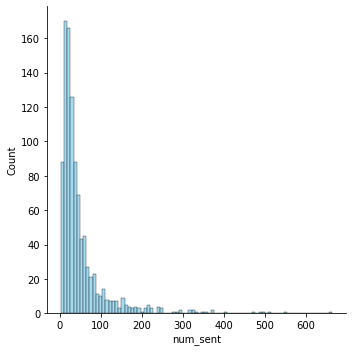

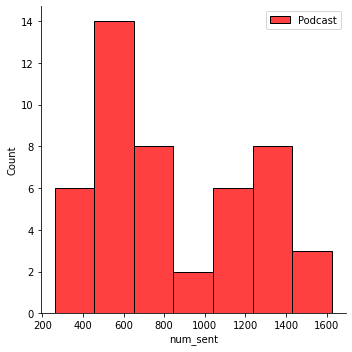

In [34]:
wiki_df['num_sent'] = wiki_df.apply(lambda row: len(row.sents), axis=1)
pod_df['num_sent'] = pod_df.apply(lambda row: len(row.sents), axis=1)

sns.displot( wiki_df['num_sent'] , color="skyblue", label='Wiki')
sns.displot( pod_df['num_sent'] , color="red", label='Podcast')
plt.legend()
plt.show()


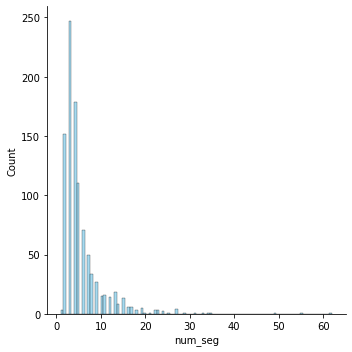

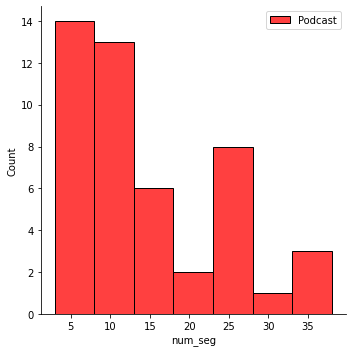

In [36]:
# number of segments
wiki_df['num_seg'] = wiki_df.apply(lambda row: sum(row.labels), axis=1)
pod_df['num_seg'] = pod_df.apply(lambda row: sum(row.labels), axis=1)

sns.displot( wiki_df['num_seg'] , color="skyblue", label='Wiki')
sns.displot( pod_df['num_seg'] , color="red", label='Podcast')
plt.legend()
plt.show()

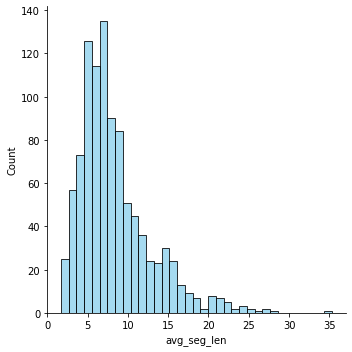

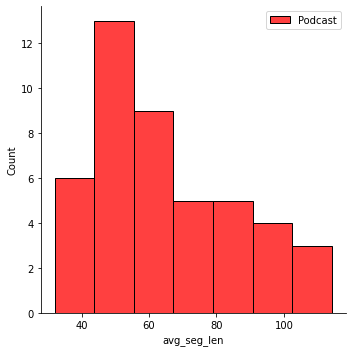

The median segment length for wiki is 7.183
The median segment length for podcasts is 59.556


In [37]:
# average segment length
wiki_df['avg_seg_len'] = wiki_df.apply(lambda row: row.num_sent/row.num_seg, axis=1)
pod_df['avg_seg_len'] = pod_df.apply(lambda row: row.num_sent/row.num_seg, axis=1)
pod_df = pod_df.mask((pod_df['avg_seg_len'] - pod_df['avg_seg_len'].mean()).abs() > 2 * pod_df['avg_seg_len'].std())
pod_df = pod_df.dropna()


sns.displot( wiki_df['avg_seg_len'] , color="skyblue", label='Wiki')
sns.displot( pod_df['avg_seg_len'] , color="red", label='Podcast')
plt.legend()
plt.show()

avg_seg_wiki = wiki_df['avg_seg_len'].median()
avg_seg_pod = pod_df['avg_seg_len'].median()
print('The median segment length for wiki is {:0.3f}'.format(avg_seg_wiki))
print('The median segment length for podcasts is {:0.3f}'.format(avg_seg_pod))